# Read and Cluster Mill Data
04 Dec 2023: John A. Thompson (Information Professionals GmbH)

Processing:
  - 1
  - 2

In [19]:
# Set up environment.

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

import seaborn as sns
sns.set(context='notebook', font='monospace')

In [20]:
# Define params.

FNAME =  './mill.csv'

In [21]:
df = pd.read_csv(FNAME, sep=';', dtype={'Sorte': object})

In [22]:
df

,Sorte,ZM,Datum,Betriebszeit,Gesamtenergie,Produktion,kWh/t,t/h
0,01,ZMA,2021-02-09 00:00:00,3.82,10639.81,372.20,28.586271,97.434555
1,01,ZMA,2021-02-17 00:00:00,17.29,24280.89,858.17,28.293800,49.633892
2,01,ZMA,2021-02-18 00:00:00,0.00,0.00,0.00,NaN,NaN
3,01,ZMA,2021-07-16 00:00:00,1.61,2212.74,68.62,32.246284,42.621118
4,01,ZMA,2021-07-29 00:00:00,1.47,1960.19,62.97,31.128950,42.836735
...,...,...,...,...,...,...,...,...
4546,04,ZMC,2022-11-28 00:00:00,20.08,11956.19,287.21,41.628739,14.303287
4547,04,ZMC,2022-11-29 00:00:00,24.00,14245.37,338.76,42.051511,14.115000
4548,04,ZMC,2022-11-30 00:00:00,22.30,13235.85,324.15,40.832485,14.535874
4549,04,ZMC,2022-12-01 00:00:00,0.43,257.95,5.56,46.393885,12.930233


In [23]:
df.Gesamtenergie.max()

57893.78

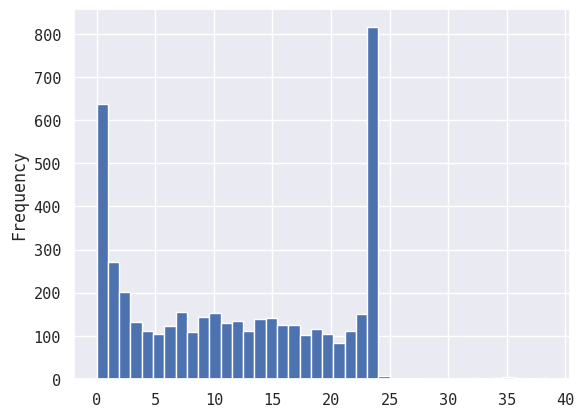

In [24]:
df.Betriebszeit.plot(kind='hist', bins=40);

In [25]:
df.describe()

C:\Users\paule\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\paule\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,Betriebszeit,Gesamtenergie,Produktion,kWh/t,t/h
count,4551.000000,4551.000000,4551.000000,4197.000000,4187.000000
mean,11.971404,14666.058178,474.174252,inf,NaN
std,8.755179,12375.031234,425.377448,NaN,NaN
min,0.000000,0.000000,-2500.000000,-43.298832,-inf
25%,3.060000,2744.905000,80.560000,29.018088,18.362854
50%,11.570000,12268.760000,366.680000,32.892882,41.061069
75%,20.750000,26504.730000,831.370000,35.981050,48.813479
max,38.480000,57893.780000,3390.420000,inf,inf


## Agglomerative Clustering

In [32]:
cluster_cols = ['Gesamtenergie', 'Produktion', 'kWh/t', 't/h']
cluster_df = df[cluster_cols].replace({np.inf: np.NaN, -np.inf:np.NaN}).dropna()

In [38]:
n_clusters = 8
agg_clusters = AgglomerativeClustering(n_clusters=n_clusters).fit_predict(cluster_df.values)
agg_clusters = KMeans(n_clusters=n_clusters).fit_predict(cluster_df.values)

C:\Users\paule\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [39]:
pd.value_counts(agg_clusters).sort_index()

C:\Users\paule\AppData\Local\Temp\ipykernel_3308\4210025347.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(agg_clusters).sort_index()


0    553
1    527
2    410
3    355
4    432
5    561
6    485
7    850
Name: count, dtype: int64

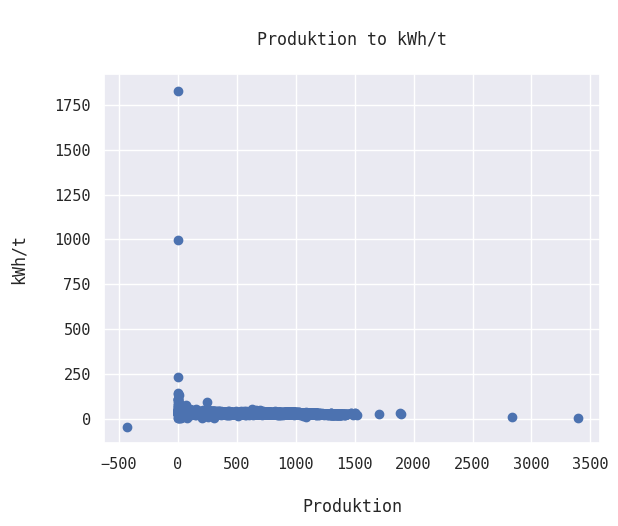

In [40]:
x_axis = 'Produktion'
y_axis = 'kWh/t'
plt.title('\n{} to {}\n'.format(x_axis, y_axis))
plt.xlabel('\n{}'.format(x_axis))
plt.ylabel('{}\n'.format(y_axis))
plt.scatter(cluster_df[x_axis], cluster_df[y_axis])
plt.show()

In [41]:
limits = {
    'Gesamtenergie': (0, 100000),
    'Produktion': (0, 10000),
    'kWh/t': (0, 2000),
    't/h': (0, 600)
}
charts = [
    ('Gesamtenergie', 't/h'),
    ('Produktion', 't/h'),
    ('kWh/t', 't/h'),
    ('Gesamtenergie', 'kWh/t'),
    ('Produktion', 'kWh/t'),
    ('Gesamtenergie', 'Produktion')
]

C:\Users\paule\AppData\Local\Temp\ipykernel_3308\2006963542.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('seismic', n_clusters)    # n discrete colors


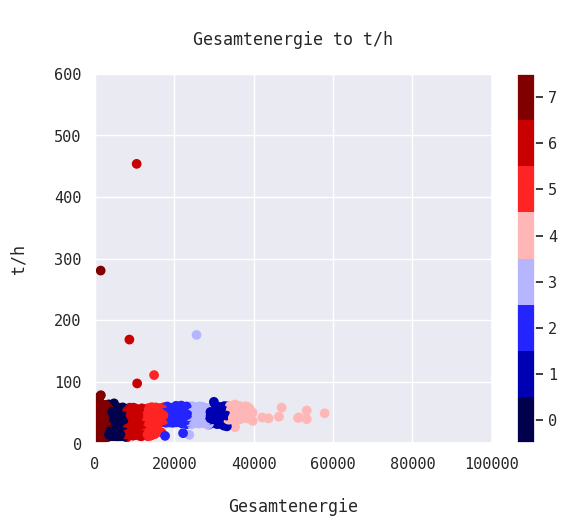

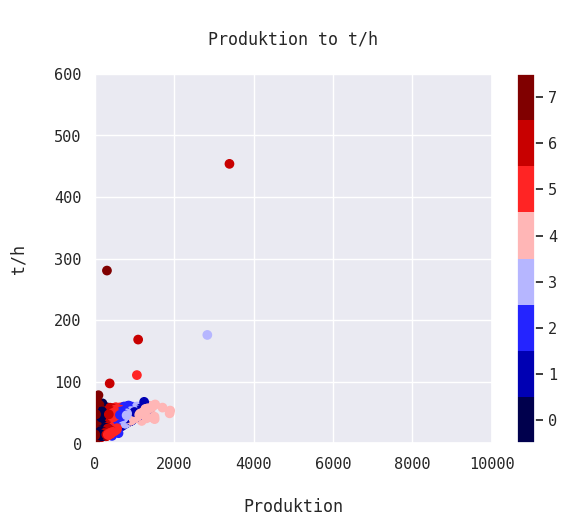

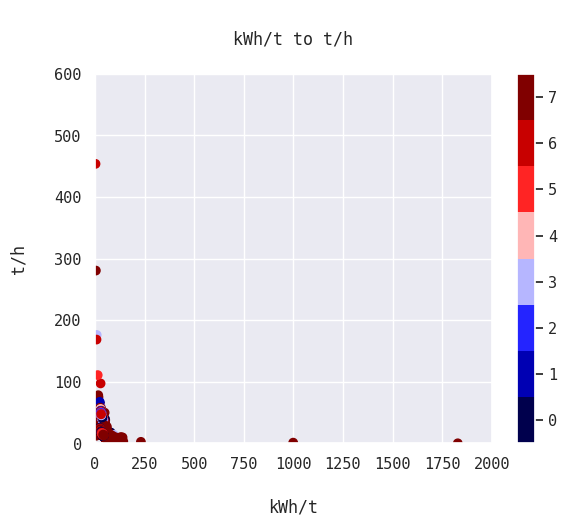

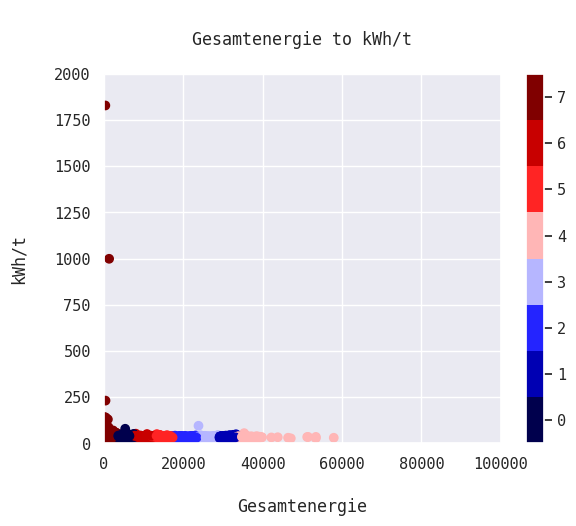

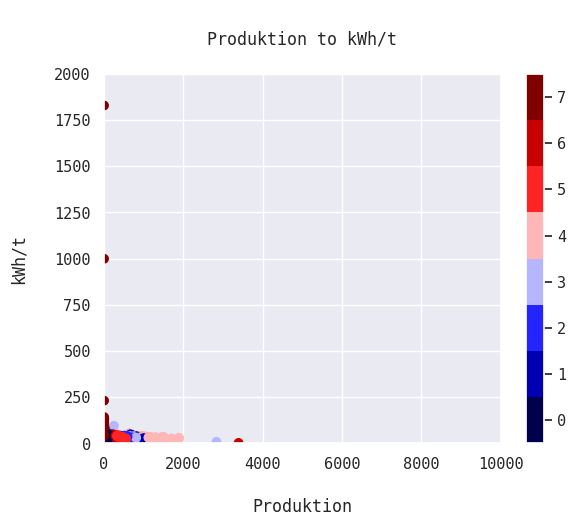

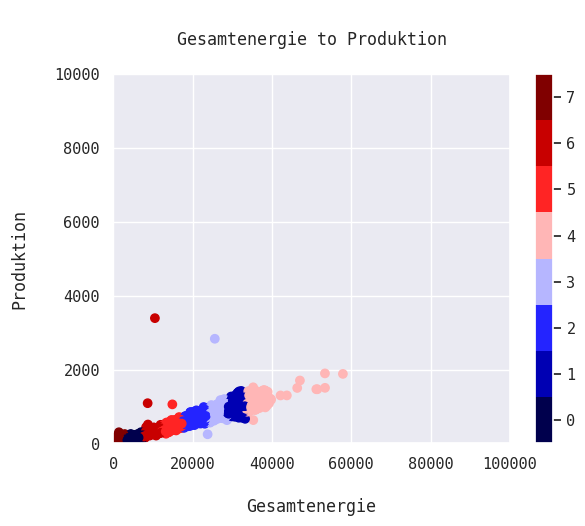

In [42]:
colors = agg_clusters
cmap = plt.cm.get_cmap('seismic', n_clusters)    # n discrete colors

for x_axis, y_axis in charts:
    plt.title('\n{} to {}\n'.format(x_axis, y_axis))
    plt.xlabel('\n{}'.format(x_axis))
    plt.ylabel('{}\n'.format(y_axis))
    plt.scatter(cluster_df[x_axis], cluster_df[y_axis], c=colors, cmap=cmap)
    plt.xlim(limits[x_axis])
    plt.ylim(limits[y_axis])
    cbar = plt.colorbar(ticks=np.array(range(n_clusters)))
    plt.clim(-0.5, n_clusters-0.5)
    plt.show()